<a href="https://colab.research.google.com/github/DANGKHOIk22/data-science/blob/main/DS2024_Lab03_22280049_VuDangKhoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("cancer_reg.csv")

In [ ]:
df.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [ ]:
df.isnull().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

3047 rows , 32 columns

In [ ]:
df.shape

(3047, 33)

Feature pctsomecol18_24 has many null values, so dropping it

In [ ]:
df.drop(['pctsomecol18_24'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            


I have two features, 'binnedic' and 'geography', which are both of object type. Therefore, I've decided to use a one-hot encoder for the 'binnedic' feature and to augment the dataset with additional data for the 'geography' feature.

In [ ]:
df['binnedinc'].value_counts()

binnedinc
(54545.6, 61494.5]    306
[22640, 34218.1]      306
(45201, 48021.6]      306
(48021.6, 51046.4]    305
(42724.4, 45201]      305
(51046.4, 54545.6]    305
(37413.8, 40362.7]    304
(40362.7, 42724.4]    304
(34218.1, 37413.8]    304
(61494.5, 125635]     302
Name: count, dtype: int64

In [ ]:
dummies=pd.get_dummies(df.binnedinc,dtype=int)

In [ ]:
df=pd.concat([df,dummies],axis=1)

In [ ]:
location=pd.read_excel('Location.xlsx')

In [ ]:
location.head()

,State,Latitude,Longitude
0,Alabama,32.806671,-86.791130
1,Alaska,61.370716,-152.404419
2,Arizona,33.729759,-111.431221
3,Arkansas,34.969704,-92.373123
4,California,36.116203,-119.681564


In [ ]:
df['geography'].value_counts()

geography
Kitsap County, Washington            1
Ralls County, Missouri               1
Pemiscot County, Missouri            1
Perry County, Missouri               1
Pettis County, Missouri              1
                                    ..
San Bernardino County, California    1
Cullman County, Alabama              1
San Diego County, California         1
San Francisco County, California     1
Geary County, Kansas                 1
Name: count, Length: 3047, dtype: int64

In [ ]:
df['State']=df['geography'].apply(lambda x: x.split(",")[1])

In [ ]:
df['State']=df['State'].apply(lambda x:x.strip())

In [ ]:
avg_house=pd.read_csv('avg-household-size.csv')

In [ ]:
avg_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   statefips         3220 non-null   int64  
 1   countyfips        3220 non-null   int64  
 2   avghouseholdsize  3220 non-null   float64
 3   geography         3220 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 100.8+ KB


i add 'Longitude' and 'Latidue' features for 'State' feature

In [ ]:
df=pd.merge(df, location, on='State', how='left')

avg_house doen't have missing values. So we can merge data

In [ ]:
df=pd.merge(df, avg_house, on='geography', how='left')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [ ]:
df.isnull().sum()

avganncount                  0
avgdeathsperyear             0
target_deathrate             0
incidencerate                0
medincome                    0
popest2015                   0
povertypercent               0
studypercap                  0
binnedinc                    0
medianage                    0
medianagemale                0
medianagefemale              0
geography                    0
percentmarried               0
pctnohs18_24                 0
pcths18_24                   0
pctbachdeg18_24              0
pcths25_over                 0
pctbachdeg25_over            0
pctemployed16_over         152
pctunemployed16_over         0
pctprivatecoverage           0
pctprivatecoveragealone    609
pctempprivcoverage           0
pctpubliccoverage            0
pctpubliccoveragealone       0
pctwhite                     0
pctblack                     0
pctasian                     0
pctotherrace                 0
pctmarriedhouseholds         0
birthrate                    0
(34218.1

Removing object features

In [ ]:
df.drop(['binnedinc','geography','State'],axis=1,inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
target=np.array(df['target_deathrate'])
df=df.drop('target_deathrate',axis=1)

In [ ]:
data=df.copy()

Performing PCA on un-normalized variables will lead to exponentially large loadings for variables with high variance. In turn, this will lead to the dependence of a principal component on the variable with high variance. This is undesirable.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df=scaler.fit_transform(df)

# Implement PCA:

Text(0, 0.5, 'PCA 2')

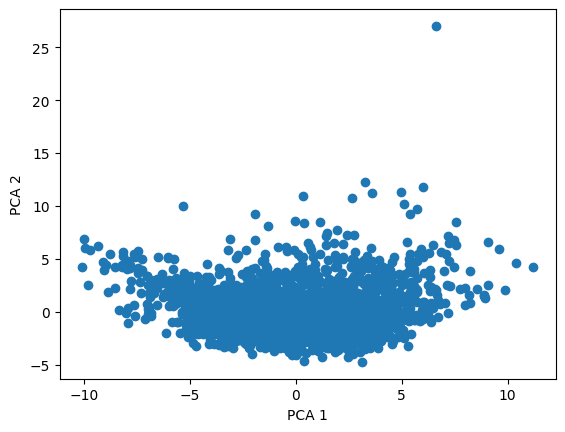

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xx=pca.fit_transform(df)
plt.scatter(Xx[:,0],Xx[:,1])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

In [ ]:
pca = PCA(n_components=43)
pca.fit(df)

PCA(n_components=43)

The ability to capture variance of each principal component decreases gradually.

Since eigenvectors are orthogonal to each other, they do not capture any unique variance in the data beyond what has already been captured by other directions.So variance of each principal component decreases gradually

Text(0, 0.5, 'Variance')

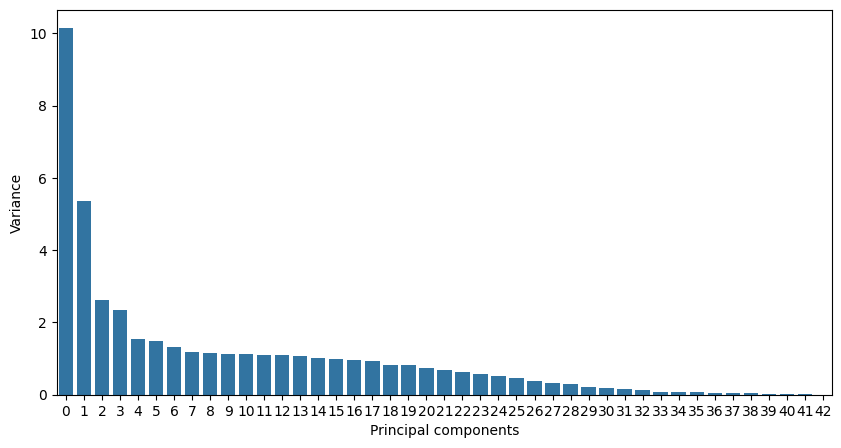

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(pca.explained_variance_)
plt.xlabel("Principal components")
plt.ylabel("Variance")

The ability to capture information of each  principal component decreases gradually.

In [ ]:
pd.DataFrame(pca.explained_variance_ratio_,columns=['Percentage of information'])[:10]

,Percentage of information
0,0.230495
1,0.121723
2,0.059268
3,0.053527
4,0.035338
5,0.033604
6,0.030313
7,0.027030
8,0.026454
9,0.025658


Text(0, 0.5, 'Percentage of information')

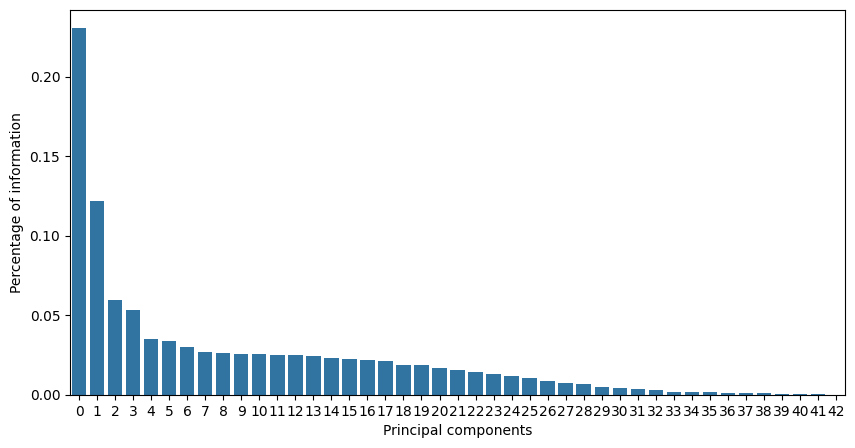

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(pca.explained_variance_ratio_)
plt.xlabel("Principal components")
plt.ylabel("Percentage of information")

# Dimensionality Reduction:

So choosing 26 components is optimal and capture more than 95% information

In [ ]:
np.argmax(np.cumsum(pca.explained_variance_ratio_)>=0.95)+1

26

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
LR1=LinearRegression()
LR1.fit(df,target)

LinearRegression()

In [ ]:
pca = PCA(n_components=26)
x_new=pca.fit_transform(df)
LR2=LinearRegression()
LR2.fit(x_new,target)

LinearRegression()

In [ ]:
MSE1= MSE(target,LR1.predict(df))

In [ ]:
print( MSE(target,LR1.predict(df)))
print( MSE(target,LR2.predict(x_new)))

368.2714007303297
390.98849833277023


In [ ]:
deviation=[]

for i in range(1,45):
  pca = PCA(n_components=i)
  x_new=pca.fit_transform(df)
  LR2=LinearRegression()
  LR2.fit(x_new,target)
  MSE2=MSE(target,LR2.predict(x_new))
  deviation.append(MSE2-MSE1)
deviation=np.array(deviation)

The more components utilized in PCA, the better the performance tends to be ( the closer score to without PCA)

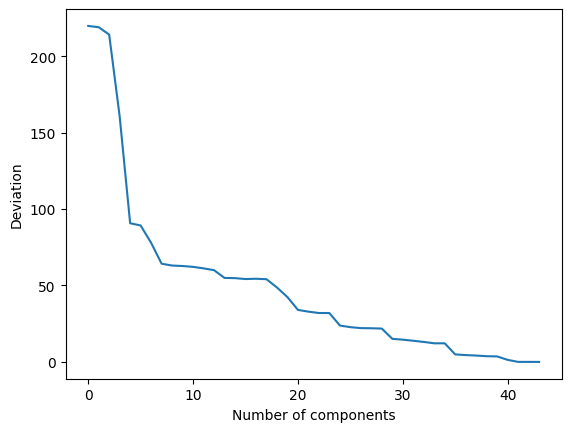

In [ ]:
plt.plot(deviation)
plt.xlabel('Number of components')
plt.ylabel('Deviation')
plt.show()

# Interpretation and Analysis:


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,target,test_size=0.2,random_state=2)
MSE_train=[]
MSE_test=[]
for i in range(1,44):
   pca=PCA(n_components=i)
   X_train_new=pca.fit_transform(X_train)
   LR=LinearRegression()
   LR.fit(X_train_new,y_train)
   y_pred=LR.predict(pca.transform(X_test))
   MSE_test.append(MSE(y_pred,y_test))
   MSE_train.append(MSE(LR.predict(X_train_new),y_train))
MSE_test=np.array(MSE_test)
MSE_train=np.array(MSE_train)

In [ ]:
MSE_train

array([584.64560755, 584.26710664, 555.03724404, 496.47971913,
       480.60312607, 442.57230679, 431.70522812, 434.05458277,
       428.35813014, 428.58039087, 427.44139995, 427.69562343,
       427.38792489, 422.51890943, 421.94034792, 420.64105149,
       420.6134322 , 420.00168705, 405.89068751, 405.24480444,
       399.91431136, 399.14064182, 398.23502832, 396.47905648,
       389.96401232, 389.49315462, 388.68658269, 388.68328156,
       388.43526411, 384.37113488, 383.08066025, 382.00243162,
       381.61384161, 380.85579317, 380.74243201, 372.06660718,
       368.2234988 , 368.05882534, 367.24710135, 366.5144098 ,
       363.6569177 , 361.90222989, 361.82958037])

The result exhibits an overfitting trend.

In [ ]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
print(MSE(y_pred,y_test),MSE(LR.predict(X_train),y_train))

415.6392900194173 362.3547758625296


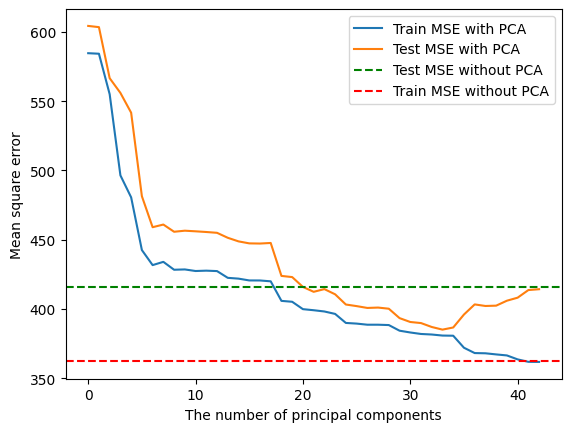

In [ ]:
plt.plot(MSE_train, label='Train MSE with PCA')
plt.plot(MSE_test, label='Test MSE with PCA')
plt.axhline(MSE(y_pred,y_test),color='g',label='Test MSE without PCA', linestyle='--')
plt.axhline(MSE(LR.predict(X_train),y_train),color='r',label='Train MSE without PCA', linestyle='--')
plt.xlabel("The number of principal components")
plt.ylabel("Mean square error")
plt.legend()
plt.show()

Due to information loss, the performance on the training set with PCA will always be worse than without PCA. However, for the test set, since we have reduced dimensions, the model hasn't learned complex features, reducing overfitting (resulting in similar performance between train and test sets). Then, we increase the dimensionality of the data until reaching a saturation point where the model overfits (learning complex features, thus reducing generalization with the data), consequently inscreasing the test result. It increases until reaching a point where the limit touches the result of the test without PCA.

Upon analyzing the plot, it's clear that the model with PCA exhibits poorer performance on the training data compared to the one without PCA. Additionally, on the testing data, model with PCA between 1-22 principal components yield worse results, while model with PCA above 35 principal components show signs of overfitting.

**Interpret the principal components:**

- Eigenvectors: These are the directions (vectors) along which the data varies the most. Each eigenvector corresponds to a principal component.
- Eigenvalues: These represent the amount of variance explained by each eigenvector. Larger eigenvalues indicate more significant contributions.

pca.explained_variance_ represents eigenvalues, sorted in descending order, indicating the variance explained by each principal component.As it is sorted in descending order, variance per principal component decreases.

In [ ]:
pca=PCA(n_components=26)
pca.fit(df)

PCA(n_components=26)

In [ ]:
pca.explained_variance_ # Eigen Values

array([10.1461296 ,  5.35810057,  2.60892857,  2.35620659,  1.5555265 ,
        1.47923138,  1.33435571,  1.18983554,  1.16449007,  1.12944768,
        1.11942763,  1.11217516,  1.10624596,  1.06832348,  1.02672305,
        0.97956387,  0.94913225,  0.93223738,  0.82049489,  0.81951644,
        0.73327601,  0.69221077,  0.62471024,  0.56883337,  0.52790063,
        0.45969054])

This shows that first principal components explains 23.2 % variance, second principal component explain 12.17% variance

In [ ]:
pd.DataFrame(pca.explained_variance_ratio_,columns=['Percentage of information'])[:10]

,Percentage of information
0,0.230495
1,0.121723
2,0.059268
3,0.053527
4,0.035338
5,0.033604
6,0.030313
7,0.027030
8,0.026454
9,0.025658


pca.components_ contains the principal axes in feature space,representing the directions of maximum variance in the data. Each row corresponds to a principal component, and the columns represent the original features in the dataset. These principal components are orthogonal to each other.

In [ ]:
pca.components_  # Eigen Vectors

array([[ 0.08394036,  0.06351862,  0.01123869, ...,  0.0346327 ,
        -0.01875801, -0.01860848],
       [ 0.24537436,  0.2661639 ,  0.0149103 , ..., -0.06611406,
         0.03681117,  0.21676226],
       [ 0.35336356,  0.35764129,  0.16847822, ..., -0.04342438,
        -0.15185631, -0.33823794],
       ...,
       [-0.10316016, -0.08205859, -0.04615277, ...,  0.06723377,
         0.11253347,  0.22841726],
       [-0.01590755, -0.02960408,  0.36699553, ...,  0.25268822,
        -0.27565896, -0.17705235],
       [ 0.00281731,  0.00793595,  0.14103191, ..., -0.03118796,
        -0.05455866,  0.12917237]])

Each value in the resulting array represents the percentage of information retained after using a certain number of components.

First principal component captures 23 % informtaion, first and second principal component capture 35.2 % information

In [ ]:
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_),columns=['Percentage of information'])[:10]

,Percentage of information
0,0.230495
1,0.352218
2,0.411486
3,0.465013
4,0.500351
5,0.533956
6,0.564269
7,0.591299
8,0.617753
9,0.643412


The more components are , the more information is retained

Text(0, 0.5, 'Percentage of information')

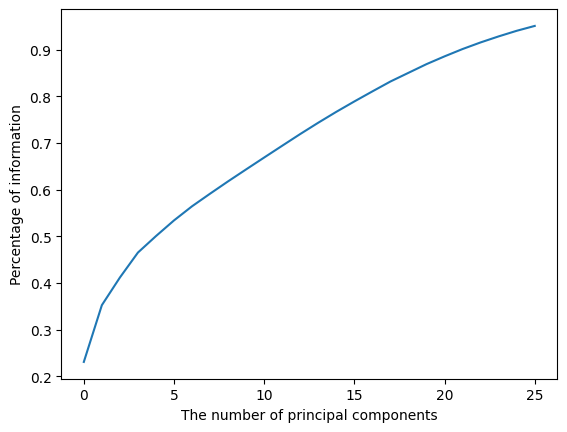

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("The number of principal components")
plt.ylabel("Percentage of information")

PCA can help with multicollinearity. It can reduce multicollinearity by transforming the original variables into a smaller set of uncorrelated variables through orthogonal eigen vectors.If two directions are not orthogonal, they are linearly dependent on each other, which means that one direction can be expressed as a linear combination of the other direction. If two directions are orthogonal , they do not capture any unique variance in the data beyond what the first direction has already caught.

Upon examining the heatmap, it becomes evident that the data exhibits high correlation among certain features

<Axes: >

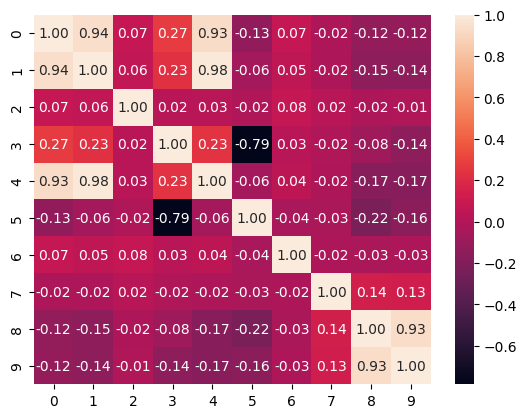

In [ ]:
cor=pd.DataFrame(df[:,:10]).corr()
sns.heatmap(cor, annot=True,fmt='.2f')

After applying PCA, features no longer exhibit correlation

<Axes: >

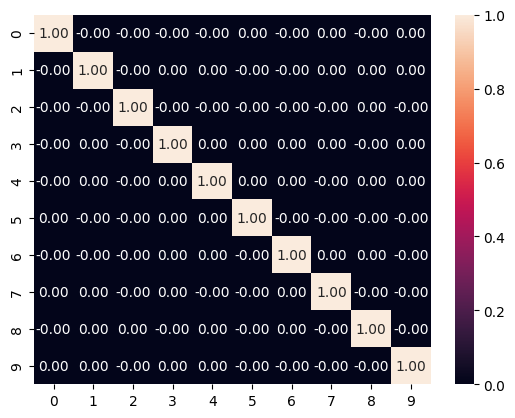

In [ ]:
pca = PCA(n_components=10)
x_new=pca.fit_transform(df)
x_new=pd.DataFrame(x_new)
cor=x_new.corr()
sns.heatmap(cor, annot=True,fmt='.2f')

The eigenvectors are orthogonal to each other

In [ ]:
eigenvecs=pca.components_

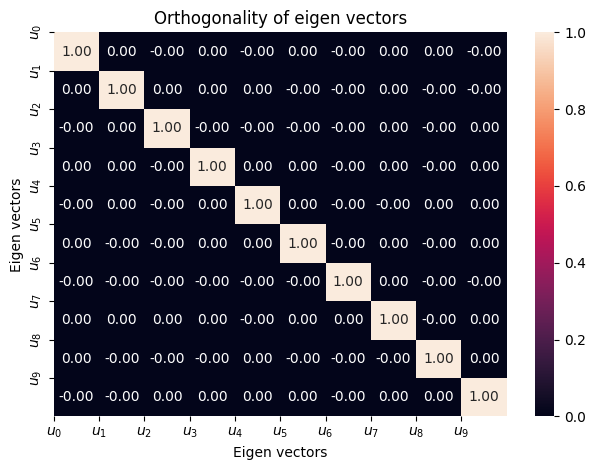

In [ ]:
table = np.zeros((len(eigenvecs), len(eigenvecs)))

labels = [f'$u_{{{i}}}$' for i in range(len(eigenvecs))]

fig, ax = plt.subplots()

for i, vec_x in enumerate(eigenvecs):
    for j, vec_y in enumerate(eigenvecs):
        table[i, j] = vec_x.T.dot(vec_y)

sns.heatmap(table, annot=True, fmt='.2f', ax=ax)

ax.set(xlabel='Eigen vectors',
       ylabel='Eigen vectors',
       title='Orthogonality of eigen vectors',
       xticks=np.arange(len(eigenvecs)),
       yticks=np.arange(len(eigenvecs)),
       xticklabels=labels,
       yticklabels=labels)

plt.tight_layout()
plt.show()

**Underlying structure of the data:**

In [ ]:
pca = PCA(n_components=40)
x_new=pca.fit_transform(df)

In [ ]:
Eigenvectors=pca.components_
Eigenvalues=pca.explained_variance_

I calculate the standard deviation for each sample to determine which one exhibits the high variance in principal components

In [ ]:
project=df@Eigenvectors.T
std=np.sum(abs(project-np.mean(project,axis=0)),axis=1)

In [ ]:
project[:,0]

array([ 2.10045448,  0.18505463, -1.52113677, ...,  1.74443906,
        1.92061921,  0.96940182])

<Axes: >

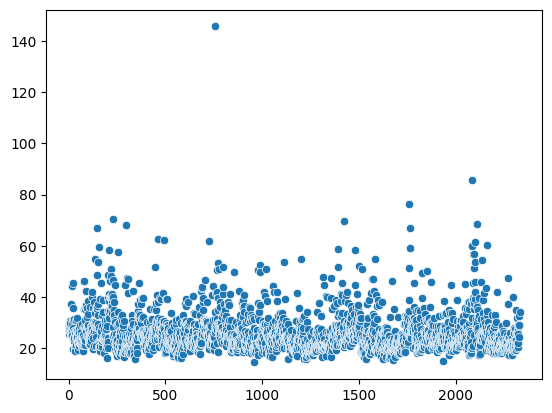

In [ ]:
sns.scatterplot(std)

samples 758,2086,1762,227,1421 result in high variance in principal components

In [ ]:
sorted(enumerate(std),key=lambda x:x[1],reverse=True)[:5]

[(758, 145.62698680259064),
 (2086, 85.8916942260886),
 (1762, 76.180116825685),
 (227, 70.33121192963071),
 (1421, 69.8153446227803)]

We can observe that Feature 5 and 2 have similar eigenvector values ( approximately 0.06), indicating multicollinearity.

In [ ]:
list(enumerate(Eigenvectors[0,:]))[:10]

[(0, 0.08394036327818558),
 (1, 0.06351861759296212),
 (2, 0.011238693723355286),
 (3, 0.274184421261756),
 (4, 0.06597454179350679),
 (5, -0.2763553341429707),
 (6, 0.02277581805191452),
 (7, -0.004407859767905741),
 (8, -0.01331739153062018),
 (9, -0.034518578314368026)]

If a component has a high positive coefficient for a feature, it means that the component increases with the feature. Conversely, if it has a low positive coefficient for a feature, it means that the component decreases with the feature

Feature 20 is the most important for the first principal component => It has a significant impact on the direction of the eigenvector.

In [ ]:
sorted(enumerate(Eigenvectors[0,:]),key=lambda x:x[1],reverse=True)[:5]

[(19, 0.2922507512697905),
 (18, 0.2844804486242825),
 (3, 0.274184421261756),
 (16, 0.267103367113416),
 (20, 0.26559524263139345)]

Feature 23 is the worst important for the first principal component => It contributes little to the direction of the eigenvector.

In [ ]:
sorted(enumerate(Eigenvectors[0,:]),key=lambda x:x[1])[:5]

[(22, -0.2782896012612455),
 (5, -0.2763553341429707),
 (21, -0.2665442309547029),
 (17, -0.21198693177947783),
 (38, -0.17316372334009927)]

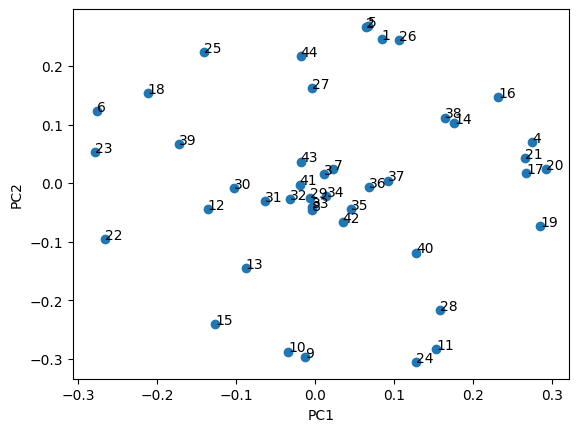

In [ ]:
n=np.arange(1,df.shape[1]+1)

fig, ax = plt.subplots()
ax.scatter(Eigenvectors[0,:],Eigenvectors[1,:] )


for i, txt in enumerate(n):
    ax.annotate(txt, (Eigenvectors[0,i],Eigenvectors[1,i]))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


We can see that Feature 20 is the most important, while Feature 23 is the least important for the first principal component, respectively. Plus, Feature 6 is the most important, while Feature 25 is the least important for the second principal component, respectively

 Points that are close together indicate a correlation between the variables they represent

Looking at that plot, Feature 5 and Feature 2 are highly correlated. In feature selection, I will drop one of the two features.

In [ ]:
np.corrcoef(df[:,4], df[:,1])[1,0]

0.9798556297869163

When two features are highly correlated, they contribute the same variance, leading to the eigenvector (vector direction) having the same value for both features

In [ ]:
pca=PCA(n_components=44)
pca.fit(df)
eigenvecs=pca.components_

In [ ]:
feature=[]
for index,eigenvec in enumerate(eigenvecs):
  feature.append({"PCA":f"PC{index+1}",
                  'The most important feature':np.argmax(eigenvec)})


In [ ]:
dataa=pd.DataFrame(feature,columns=['PCA','The most important feature'])

I find the most important feature for each principal component

In [ ]:
dataa.head()

,PCA,The most important feature
0,PC1,19
1,PC2,4
2,PC3,1
3,PC4,26
4,PC5,40


So i have 32 important features in an original data

In [ ]:
len(dataa['The most important feature'].value_counts())

32

As we can see, after 32 principal components, the information captured by each principal component decreases very slightly =>they are redudant features=> PCA helps in extracting the most important features from a high-dimensional dataset.

Text(0, 0.5, 'Variance')

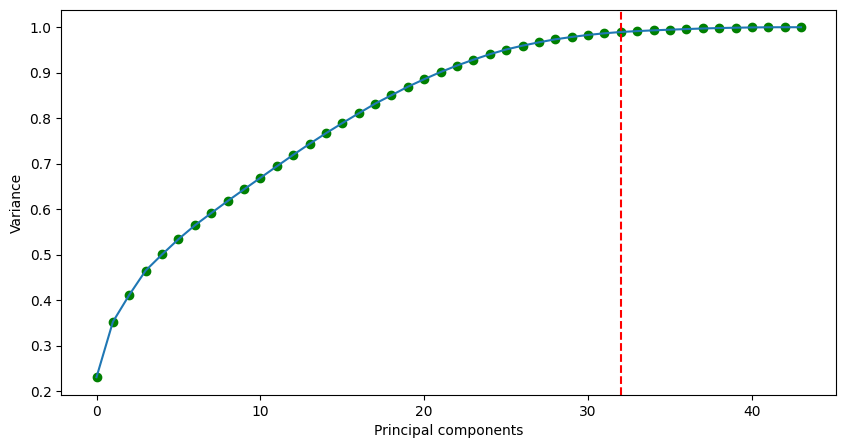

In [ ]:
cums=np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,5))
plt.plot(cums)
x = range(len(cums))
plt.scatter(x, cums, color='g')
plt.axvline(32,color='r', linestyle='--')
plt.xlabel("Principal components")
plt.ylabel("Variance")

Feature 5 is the most important

In [ ]:
dataa['The most important feature'].mode()

0    4
Name: The most important feature, dtype: int64

**Trade-offs observed between dimensionality reduction and model performance.**

Time-consuming, Information-loss ,Easier visualize, Performance

Overfitting: PCA helps in overcoming overfitting by reducing the dimensionality of the data

Information loss: A small quantity of features can lead the model to predict less precisely.

Time-cosuming: Although dimensionality reduction offers the benefit of streamlining subsequent machine learning algorithms, the upfront computational cost of the reduction process itself can be significant, particularly for datasets with a large number of data points or features with high dimensionality. This can lead to increased training time and strain resource availability



Easier visualization: Visualizing a plot with multiple dimensions can be challenging, but PCA can help by reducing dimensionality.

Performance: Fewer dimensions lead to poor results.



Using PCA is more efficient; it saves time

In [ ]:
import time
pca = PCA(n_components=10)
x_new=pca.fit_transform(df)
start_time = time.time()
LR2=LinearRegression()
LR2.fit(x_new,target)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0050699710845947266 seconds ---


In [ ]:
start_time = time.time()
LR1=LinearRegression()
LR1.fit(df,target)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.021983623504638672 seconds ---


# Report and Conclusion:

**Findings:**



 PCA helps capture significant features, which is easier for visualization

PCA reduce the impact of noise and irrelevant features


Eigenvalues tell me how much variance principal components explain. With descending order, I can identify which principal components capture the most information.

Fewer features make visualization easier and fix overfitting and are also more time efficient .

Each principal component explains which features are important for it.

Eigen vector: These represent the orientations (vectors) where the data exhibits its greatest variability. Each eigenvector corresponds to a principal component.

Eigen vector is orthogonal to each other

PCA helps in identifying dominant patterns or structures in the data by capturing the directions of maximum variance





**Methodology:**

Without scaling

A variable with a high standard deviation will have a higher weight for the calculation of axis than a variable with a low standard deviation. Because PCA projects  original data onto directions which maximize the variance. It results in a poor direction for the principal component.

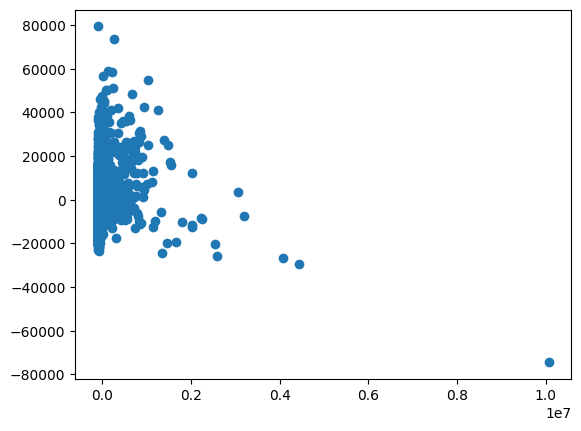

In [ ]:
pca=PCA(n_components=4)
X=pca.fit_transform(data)
plt.scatter(X[:,0],X[:,1])

In [ ]:
pca.explained_variance_

array([1.17522784e+11, 1.37779109e+08, 3.39204507e+05, 2.70751669e+05])

With scaling

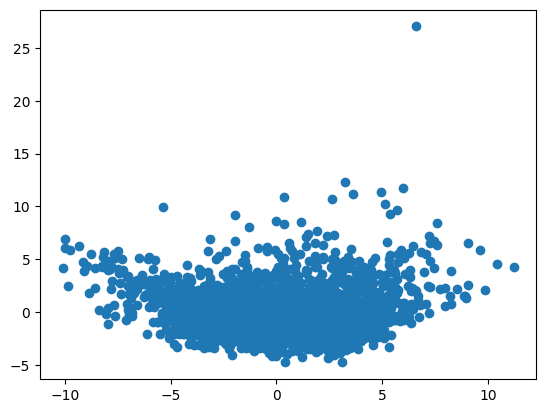

In [ ]:
scaler=StandardScaler()
X=scaler.fit_transform(data)
pca=PCA(n_components=4)
X=pca.fit_transform(X)
plt.scatter(X[:,0],X[:,1])

If I scale my data, all variables have the same standard deviation, thus all variables have the same weight and  PCA calculates relevant axis.

In [ ]:
pca.explained_variance_

array([10.1461296 ,  5.35810057,  2.60892802,  2.35620365])

We can see two plots and conclude that a PCA without scaleling would perform worse than one with scaling.

So we should normalize data before using PCA

The PCA algorithm follows these steps:

Scaling data: This ensures features with larger scales don't dominate the analysis.

Covariance matrix computation : The covariance matrix captures the linear relationships between all features.

Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components:Eigenvectors and eigenvalues are the linear algebra concepts that i need to compute from the covariance matrix in order to determine the principal components of the data. Eigenvectors corresponding to the highest eigenvalues represent the directions of greatest variance.

Choosing Principal Components:   PCA selects a subset of the principal components based on their corresponding eigenvalues or the amount of variance they explain.

Transformation: The data is projected onto the chosen principal components, resulting in a reduced-dimensionality representation.

**Insight:**



PCA can help in detecting multicollinearity (high correlation between features) in the data by identifying principal components with high variance explained by multiple original features.

It is crucial to choose the correct number of components to maintain a balance between simplifying the data and retaining meaningful information

PCA is a linear method. That is it can only be applied to datasets which are linearly separable. It does an excellent job for datasets, which are linearly separable. But, if we use it to non-linear datasets, we might get a result which may not be the optimal dimensionality reduction

**Visualizations  to illustrate key observations.**

eigen values is sorted in descending order, variance per principal component decreases.

Text(0, 0.5, 'Variance')

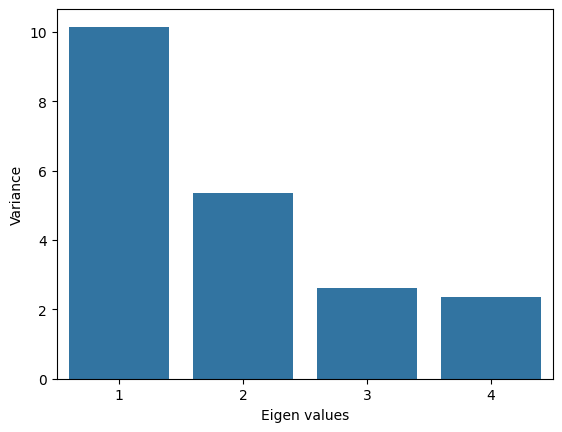

In [ ]:
sns.barplot(x=[1,2,3,4],y=pca.explained_variance_[:4])
plt.xlabel("Eigen values")
plt.ylabel('Variance')

The ability to capture information of each principal component decreases gradually.

Text(0, 0.5, 'Information each component')

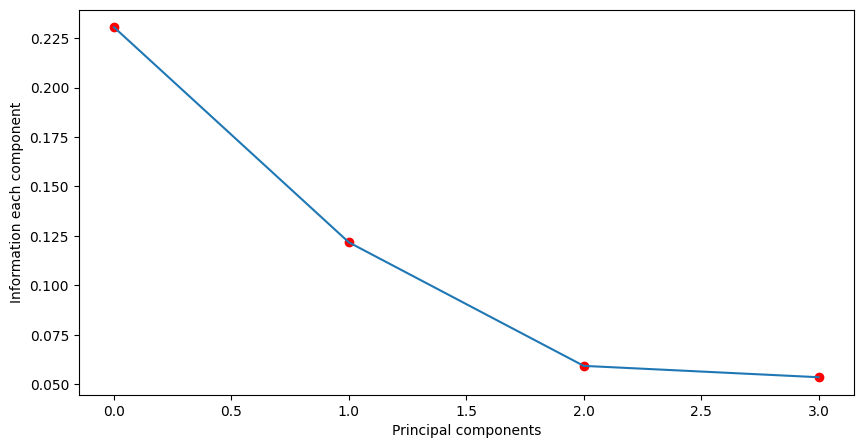

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(pca.explained_variance_ratio_)
x = range(len(pca.explained_variance_ratio_))
plt.scatter(x, pca.explained_variance_ratio_, color='r')
plt.xlabel("Principal components")
plt.ylabel("Information each component")

The more components are , the more information is retained

Text(0, 0.5, 'Percentage of variance')

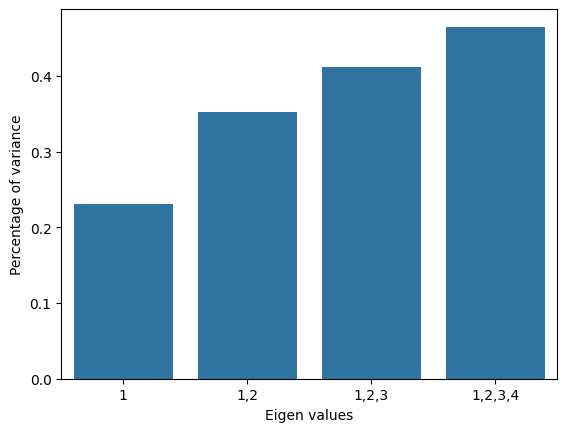

In [ ]:
sns.barplot(x=["1","1,2","1,2,3","1,2,3,4"],y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Eigen values")
plt.ylabel('Percentage of variance')

The more components utilized in PCA, the better the performance tends to be ( the closer score to without PCA)

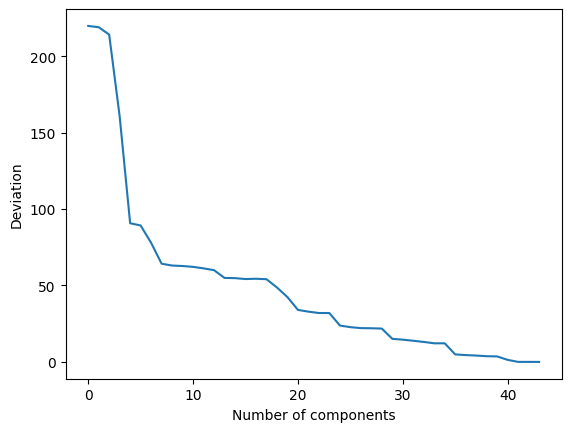

In [ ]:
plt.plot(deviation)
plt.xlabel('Number of components')
plt.ylabel('Deviation')
plt.show()

PCA can help mitigate overfitting but may also result in decreased performance on the training data.

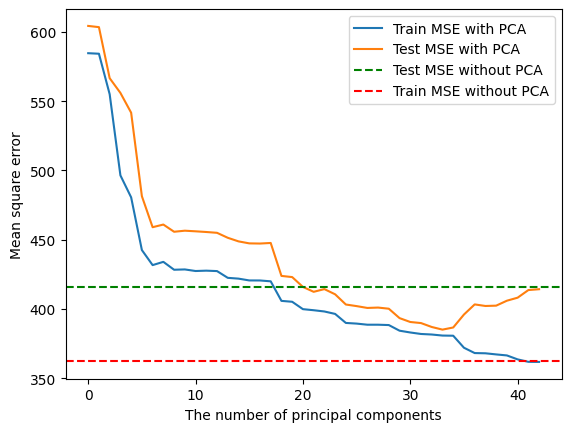

In [ ]:
plt.plot(MSE_train, label='Train MSE with PCA')
plt.plot(MSE_test, label='Test MSE with PCA')
plt.axhline(MSE(y_pred,y_test),color='g',label='Test MSE without PCA', linestyle='--')
plt.axhline(MSE(LR.predict(X_train),y_train),color='r',label='Train MSE without PCA', linestyle='--')
plt.xlabel("The number of principal components")
plt.ylabel("Mean square error")
plt.legend()
plt.show()

**Highlighting the importance of PCA in the context of dimensionality reduction and its implications for real-world data analysis.**

Principal Component Analysis (PCA) is a powerful dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space. It is  used to reduce the number of variables in a dataset while preserving as much variance as possible by ranking PCs according to importance and discarding the least important ones. It can also be a preprocessing step for other machine learning algorithms, improving their  interpretability.It can help with collinearity, which occurs when two or more variables in a dataset are highly correlated. It can reduce collinearity by transforming the original variables into a smaller set of uncorrelated variables. It makes the dataset more suitable for modeling and analysis. However, PCA assumes linearity and may struggle with non-linear relationships in the data.

Not have to use PCA for every machine learning application.  PCA should only be used if memory or computation speed becomes an issue. Otherwise, we are completely fine without it.

PCA is widely used for data visualization, noise reduction, and feature extraction in various fields, including image and signal processing, finance, and bioinformatics